<a href="https://colab.research.google.com/github/Brunorreis123/data_science/blob/main/Analise_energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando as Bibliotecas**

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

# **Carregando e configurando o DataSet**

In [2]:
# Carregando e lendo o arquivo
turbina = pd.read_csv('T1.csv')

# Retirando a Coluna de direçao do vendo
del turbina['Wind Direction (°)']

# Renomeando as colunas
turbina.columns = ['Data/Hora', 'ActivePower(KW)', 'WindSpeed(m/s)', 
                   'CurvaTeorica(KWh)']

# Transformando o DateTime
turbina['Data/Hora'] = pd.to_datetime(turbina['Data/Hora'])

# Mostrando informações do DataSet
display(turbina)

,Data/Hora,ActivePower(KW),WindSpeed(m/s),CurvaTeorica(KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


# **Plotando os dados em um gráfico**

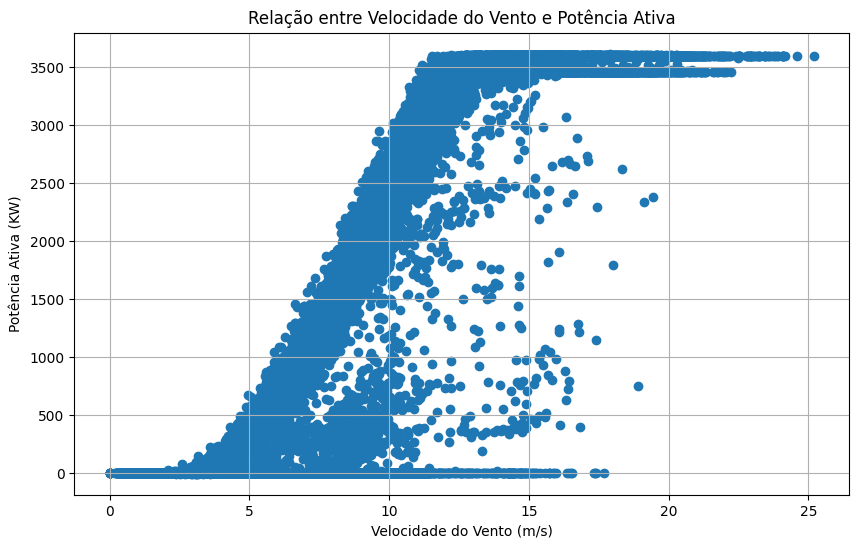

In [3]:
# Gráfico de dispersão, curva real
plt.figure(figsize=(10, 6))
plt.scatter(turbina['WindSpeed(m/s)'], turbina['ActivePower(KW)'])
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência Ativa (KW)')
plt.title('Relação entre Velocidade do Vento e Potência Ativa')
plt.grid(True)
plt.show()

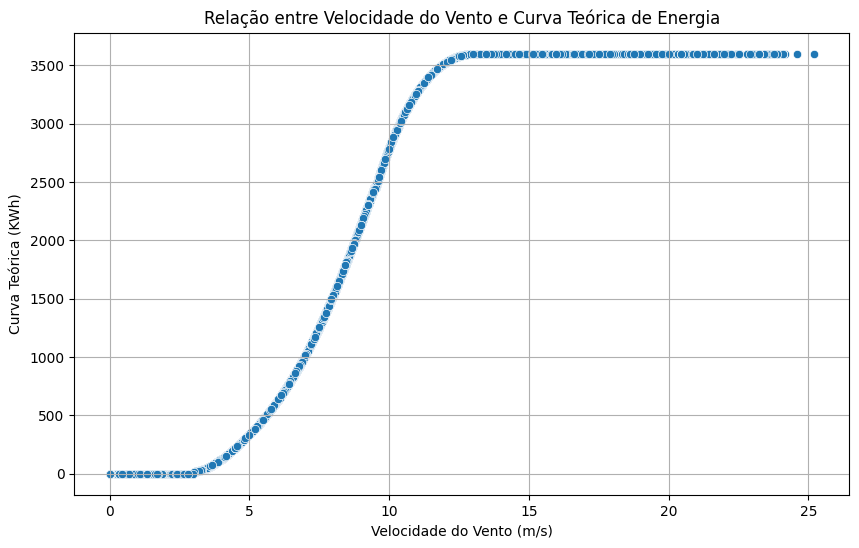

In [4]:
# Plotando os dados em um gráfico - Teórica (O que a turbina deveria esta gerando na teoria)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=turbina, x='WindSpeed(m/s)', y='CurvaTeorica(KWh)')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Curva Teórica (KWh)')
plt.title('Relação entre Velocidade do Vento e Curva Teórica de Energia')
plt.grid(True)
plt.show()

# **Criando os limites aceitáveis**

In [5]:
# Calcular os limites aceitáveis para cada variável
def calcular_limites_aceitaveis(data, desvio_padrao_multiplier=3):
    media = np.mean(data)
    desvio_padrao = np.std(data)
    limite_superior = media + desvio_padrao_multiplier * desvio_padrao
    limite_inferior = media - desvio_padrao_multiplier * desvio_padrao
    return limite_inferior, limite_superior

# Definir as colunas de interesse
colunas_interesse = ['ActivePower(KW)', 'WindSpeed(m/s)', 'CurvaTeorica(KWh)']

# Calcular os limites para cada coluna
for coluna in colunas_interesse:
    limite_inferior, limite_superior = calcular_limites_aceitaveis(turbina[coluna])
    print(f'Limites aceitáveis para {coluna}:')
    print(f'Limite Inferior: {limite_inferior}')
    print(f'Limite Superior: {limite_superior}')
    print('---')

Limites aceitáveis para ActivePower(KW):
Limite Inferior: -2629.6544335155113
Limite Superior: 5245.023097274133
---
Limites aceitáveis para WindSpeed(m/s):
Limite Inferior: -5.123420445288282
Limite Superior: 20.23932491745467
---
Limites aceitáveis para CurvaTeorica(KWh):
Limite Inferior: -2611.838640378465
Limite Superior: 5596.189566295139
---


In [6]:
# Convertendo as colunas em listas
pot_real = turbina['ActivePower(KW)'].tolist()
pot_teorica = turbina['CurvaTeorica(KWh)'].tolist()
print(pot_real[0:15])

[380.047790527343, 453.76919555664, 306.376586914062, 419.645904541015, 380.650695800781, 402.391998291015, 447.605712890625, 387.2421875, 463.651214599609, 439.725708007812, 498.181701660156, 526.816223144531, 710.587280273437, 655.194274902343, 754.762512207031]


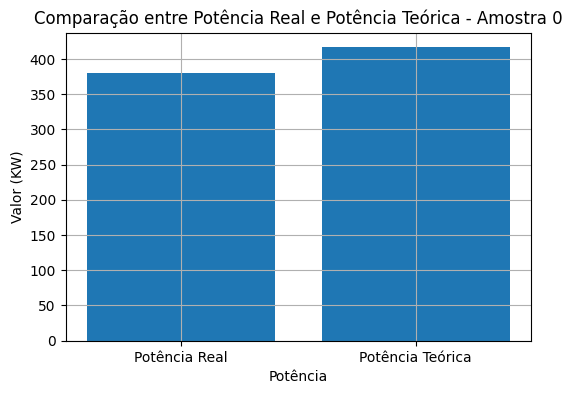

In [7]:
# Comparando as potências reais com as potências teóricas:

amostra = 0  # Índice da amostra que você deseja visualizar

# Definir as posições das barras no eixo x
posicoes = [0, 1]  # Duas posições para as duas barras (potência real e potência teórica)

# Obter os valores da amostra selecionada
pot_real_amostra = pot_real[amostra]
pot_teorica_amostra = pot_teorica[amostra]

# Plotar as barras de potência real e teórica
plt.figure(figsize=(6, 4))
plt.bar(posicoes, [pot_real_amostra, pot_teorica_amostra], tick_label=['Potência Real', 'Potência Teórica'])
plt.xlabel('Potência')
plt.ylabel('Valor (KW)')
plt.title(f'Comparação entre Potência Real e Potência Teórica - Amostra {amostra}')
plt.grid(True)
plt.show()

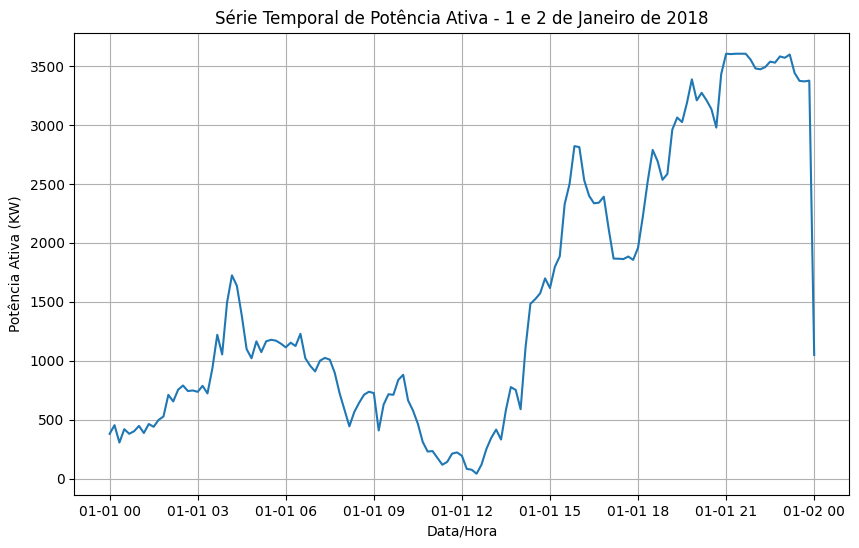

In [8]:
# Convertendo as strings para o tipo datetime
inicio = pd.to_datetime('2018-01-01')
fim = pd.to_datetime('2018-01-02')

# Filtrando os dados para os dois dias específicos em janeiro de 2018
dados_dias = turbina[(turbina['Data/Hora'] >= inicio) & (turbina['Data/Hora'] <= fim)]

# Criando o gráfico de linha para a série temporal dos dois dias selecionados
plt.figure(figsize=(10, 6))
plt.plot(dados_dias['Data/Hora'], dados_dias['ActivePower(KW)'])
plt.xlabel('Data/Hora')
plt.ylabel('Potência Ativa (KW)')
plt.title('Série Temporal de Potência Ativa - 1 e 2 de Janeiro de 2018')
plt.grid(True)
plt.show()

In [9]:
import numpy as np
from scipy.stats import mode

# Calcular a média da coluna 'ActivePower(KW)'
media = np.mean(turbina['ActivePower(KW)'])
print(f"Média: {media}")

# Calcular a mediana da coluna 'ActivePower(KW)'
mediana = np.median(turbina['ActivePower(KW)'])
print(f"Mediana: {mediana}")

# Calcular a moda da coluna 'ActivePower(KW)'
moda = mode(turbina['ActivePower(KW)'])
print(f"Moda: {moda}")

# Calcular o desvio padrão da coluna 'ActivePower(KW)'
desvio_padrao = np.std(turbina['ActivePower(KW)'])
print(f"Desvio Padrão: {desvio_padrao}")

# Calcular o valor mínimo da coluna 'ActivePower(KW)'
minimo = np.min(turbina['ActivePower(KW)'])
print(f"Mínimo: {minimo}")

# Calcular o valor máximo da coluna 'ActivePower(KW)'
maximo = np.max(turbina['ActivePower(KW)'])
print(f"Máximo: {maximo}")

# Calcular os quartis (25%, 50%, 75%) da coluna 'ActivePower(KW)'
quartis = np.percentile(turbina['ActivePower(KW)'], [25, 50, 75])
print(f"Quartis: {quartis}")


Média: 1307.6843318793105
Mediana: 825.8380737304685
Moda: ModeResult(mode=array([0.]), count=array([10781]))
Desvio Padrão: 1312.4462551316074
Mínimo: -2.47140502929687
Máximo: 3618.73291015625
Quartis: [  50.67788982  825.83807373 2482.50756836]


<ipython-input-9-0d857307854c>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda = mode(turbina['ActivePower(KW)'])


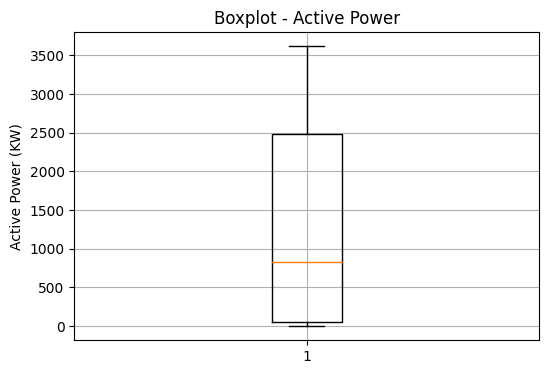

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(turbina['ActivePower(KW)'])
plt.ylabel('Active Power (KW)')
plt.title('Boxplot - Active Power')
plt.grid(True)
plt.show()

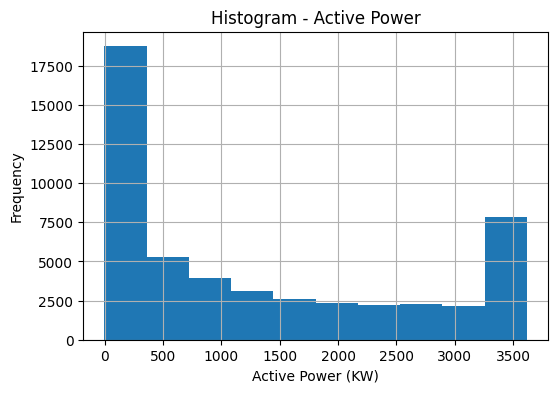

In [11]:
plt.figure(figsize=(6, 4))
plt.hist(turbina['ActivePower(KW)'], bins=10)
plt.xlabel('Active Power (KW)')
plt.ylabel('Frequency')
plt.title('Histogram - Active Power')
plt.grid(True)
plt.show()


In [16]:
# Extrair o mês da coluna 'Data/Hora'
turbina['Mes'] = turbina['Data/Hora'].dt.month

# Calcular a soma da potência ativa por mês
energia_por_mes = turbina.groupby('Mes')['ActivePower(KW)'].sum()

# Ordenar os meses em ordem decrescente com base na potência total
energia_por_mes = energia_por_mes.sort_values(ascending=False)

# Visualizar os meses com maior geração de energia
print(energia_por_mes)

Mes
3     7.788258e+06
11    6.912424e+06
8     6.689896e+06
9     5.969177e+06
2     5.452570e+06
1     5.429946e+06
10    5.214772e+06
12    5.123727e+06
6     4.998769e+06
5     4.902487e+06
4     4.495318e+06
7     3.099946e+06
Name: ActivePower(KW), dtype: float64


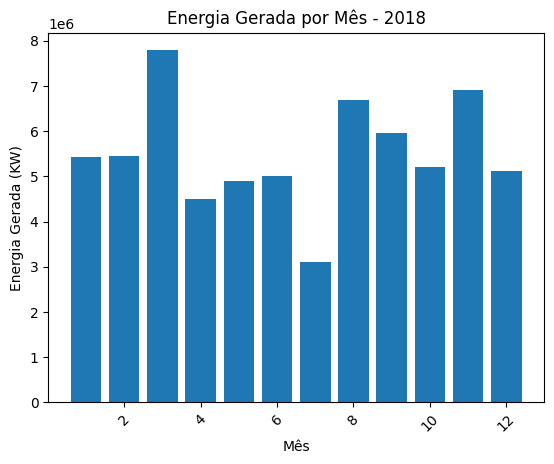

In [18]:
# Filtrar os dados para o ano de 2018
dados_2018 = turbina[turbina['Data/Hora'].dt.year == 2018]

# Calcular a soma da energia gerada por mês
energia_por_mes = dados_2018.groupby(dados_2018['Data/Hora'].dt.month)['ActivePower(KW)'].sum()

# Criar a figura e o eixo
fig, ax = plt.subplots()

# Definir os dados para o gráfico de barras
meses = energia_por_mes.index
energia_gerada = energia_por_mes.values

# Criar o gráfico de barras
ax.bar(meses, energia_gerada)

# Definir o título e os rótulos dos eixos
ax.set_title('Energia Gerada por Mês - 2018')
ax.set_xlabel('Mês')
ax.set_ylabel('Energia Gerada (KW)')

# Girar os rótulos dos meses para facilitar a leitura
plt.xticks(rotation=45)

# Exibir o gráfico
plt.show()